In [1]:
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt

In [12]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [27]:
(x_train,y_train),(_,_)=mnist.load_data()

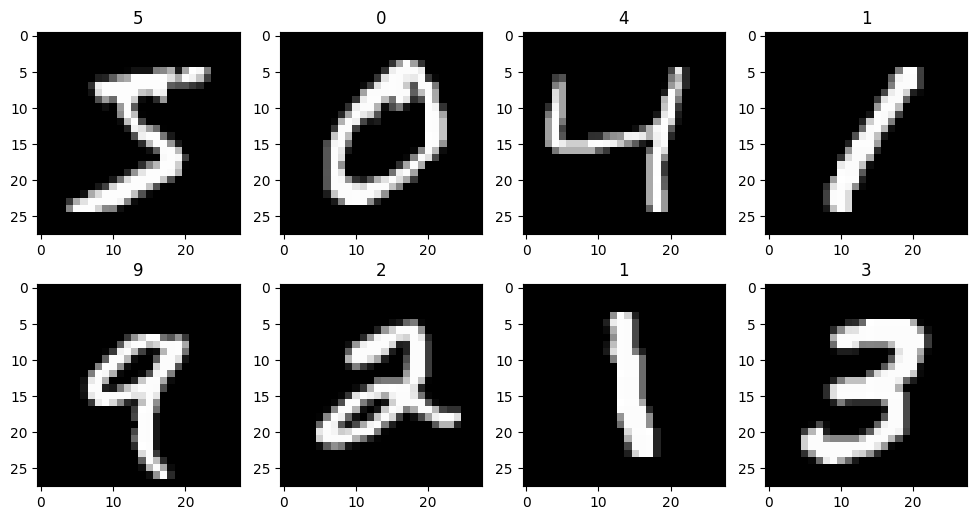

In [28]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(y_train[i])
plt.show()

In [29]:
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [30]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)

In [21]:
model=Sequential()

model.add(Input(shape=input_shape))
model.add(Conv2D(32,3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
model.fit(x_train,y_train,validation_split=0.1,epochs=15,batch_size=128)

Epoch 1/15
422/422 [==============================] - 23s 51ms/step - loss: 0.3156 - accuracy: 0.9019 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 2/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0911 - accuracy: 0.9712 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0708 - accuracy: 0.9774 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 4/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 27s 63ms/step - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.0345 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0330 - val_accuracy:

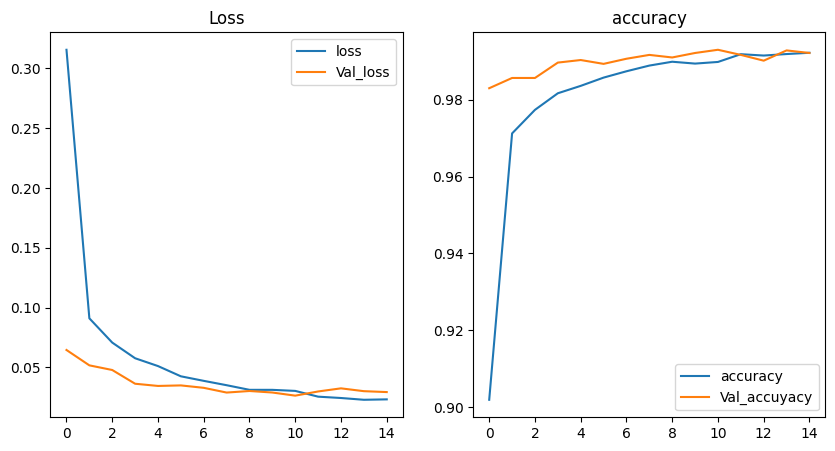

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

plt.title("Loss")
plt.legend(["loss","Val_loss"])

plt.subplot(1,2,2)
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("accuracy")
plt.legend(["accuracy","Val_accuyacy"])

plt.show()

In [31]:
model.save("model.h5")